In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import obspy
import os
import glob
from  scipy.signal import find_peaks
import pathlib
from scipy import io as sio

import hvsrpy
from hvsrpy import utils
%matplotlib inline

In [ ]:
index = np.load('index.npy', allow_pickle=True).item()

In [ ]:
path_mseed

In [ ]:
path_mseed  = pathlib.Path('./YXMK/YXsac/YXmseed')

dir_mseed = sorted(path_mseed.iterdir())

files = {}
for dir1 in dir_mseed:
    # files[dir1.stem] = sorted(dir1.glob('*.mseed'))
    try:
        print(index[dir1.stem])
        dir1.rename(pathlib.Path('./YXMK/YXsac/YXmseed/' + index[dir1.stem]))
        print(dir1.stem + ' is renamed')
    except:
        print(dir1.stem + ' is not in index')
        continue

In [4]:
### Time Domain Settings

windowlength = 300           # 60s

filter_bool = False       
filter_flow = 0.01                   
filter_fhigh = 4.                  
filter_order = 4

# Width of cosine taper {0. - 1.}. Geopsy default of 0.05 is equal to 0.1 -> 0.1 is recommended
# 余弦锥度宽度 {0. - 1.}。 Geopsy 默认值 0.05 等于 0.1 -> 建议使用 0.1
width = 0.1

### Frequency Domain Settings

# Konno and Ohmachi smoothing constant. 40 is recommended.
bandwidth = 20
# Minimum frequency after resampling
resample_fmin = 0.1
# Maximum frequency after resampling
resample_fmax = 2.
# Number of frequencies after resampling 重采样后的频率点数
resample_fnum = 512
# Type of resampling {'log', 'linear'}
resample_type = 'linear'
# Upper and lower frequency limits to restrict peak selection. To use the entire range use `None`.
peak_f_lower = None
peak_f_upper = None


### HVSR Settings

# Method for combining horizontal components {"squared-average", "geometric-mean", "single-azimuth"}.
# Geopsy's default is "squared-average" -> "geometric-mean" is recommended.
method = "geometric-mean"
# If method="single-azimuth", set azimuth in degree clock-wise from north. If method!="single-azimuth", value is ignored.
azimuth = 0

# Boolean to control whether frequency domain rejection proposed by Cox et al. (2020) is applied.
# Geopsy does not offer this functionality.
rejection_bool = True
# Number of standard deviations to consider during rejection. Smaller values will reject more windows -> 2 is recommended.
n = 2
# Maximum number of iterations to perform for rejection -> 50 is recommended.
max_iterations = 50

# Distribution of f0 {"lognormal", "normal"}. Geopsy default "normal" -> "lognormal" is recommended.
distribution_f0 = "lognormal"
# Distribution of mean curve {"lognormal", "normal"}. Geopsy default "lognormal" -> "lognormal" is recommended.
distribution_mc = "lognormal"


In [6]:
path_Line1  = pathlib.Path('./YXMK/YXsac/YXmseed/Line1/')

dir_mseed = sorted(path_Line1.iterdir())

files = []
for dir1 in dir_mseed:
    # files.append(sorted(dir1.iterdir()))
    files.append(sorted(list(dir1.iterdir()), key=lambda x: int(x.stem.split('hour')[1])))

In [4]:
path_Line1  = pathlib.Path('../inSightDataProcess/DATA/LOW_FREQUENCY/B/')

dir_mseed = sorted(path_Line1.iterdir())

files = []
for dir1 in dir_mseed:
    # files.append(sorted(dir1.iterdir()))
    files.append(sorted(dir1.iterdir()))

In [65]:
# hv_df = pd.DataFrame()

yy = []
hvs = []
for index, dirname in enumerate(files):
    file_name = dirname[50]
    print(f'{index:03d}: ', file_name)

    sensor = hvsrpy.Sensor3c.from_mseed(str(file_name))

    # sensor.bandpassfilter(filter_flow, filter_fhigh, filter_order)
    
    bp_filter = {"flag":filter_bool, 
                "flow":filter_flow, 
                "fhigh":filter_fhigh, 
                "order":filter_order}

    resampling = {"minf":resample_fmin, 
                "maxf":resample_fmax, 
                "nf":resample_fnum, 
                "res_type":resample_type}

    hv = sensor.hv(windowlength, 
                bp_filter, 
                width, 
                bandwidth, 
                resampling, 
                method, 
                f_low=peak_f_lower, 
                f_high=peak_f_upper, 
                azimuth=azimuth)

    yy.append(hv.mean_curve(distribution_mc))
    hvs.append(hv)


yy = np.array(yy)

000:  YXMK/YXsac/YXmseed/Line1/000/hour51.mseed
001:  YXMK/YXsac/YXmseed/Line1/001/hour51.mseed
002:  YXMK/YXsac/YXmseed/Line1/002/hour51.mseed
003:  YXMK/YXsac/YXmseed/Line1/003/hour51.mseed
004:  YXMK/YXsac/YXmseed/Line1/004/hour51.mseed
005:  YXMK/YXsac/YXmseed/Line1/005/hour51.mseed
006:  YXMK/YXsac/YXmseed/Line1/006/hour51.mseed
007:  YXMK/YXsac/YXmseed/Line1/007/hour51.mseed
008:  YXMK/YXsac/YXmseed/Line1/008/hour51.mseed
009:  YXMK/YXsac/YXmseed/Line1/009/hour51.mseed
010:  YXMK/YXsac/YXmseed/Line1/010/hour51.mseed
011:  YXMK/YXsac/YXmseed/Line1/011/hour51.mseed
012:  YXMK/YXsac/YXmseed/Line1/012/hour51.mseed
013:  YXMK/YXsac/YXmseed/Line1/013/hour51.mseed
014:  YXMK/YXsac/YXmseed/Line1/014/hour51.mseed
015:  YXMK/YXsac/YXmseed/Line1/015/hour51.mseed
016:  YXMK/YXsac/YXmseed/Line1/016/hour51.mseed
017:  YXMK/YXsac/YXmseed/Line1/017/hour51.mseed
018:  YXMK/YXsac/YXmseed/Line1/018/hour51.mseed
019:  YXMK/YXsac/YXmseed/Line1/019/hour51.mseed
020:  YXMK/YXsac/YXmseed/Line1/020/hour5

In [47]:
for amp in hv.amp[hv.rejected_window_indices]:
    plt.plot(hv.frq, amp, color='#00ffff', linewidth=0.1, zorder=2, label=label)
    label=None
plt.show()

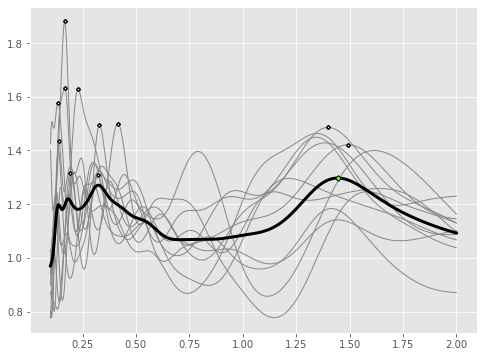

In [75]:
hv = hvs[10]

_ymin, _ymax = 0.25, 2.
with plt.style.context('ggplot'):
    fig = plt.figure(figsize=(8, 6))
    
    for amp in hv.amp[hv.valid_window_indices]:
        plt.plot(hv.frq, amp, color='#888888', linewidth=1.)
        
        # Window Peaks
        plt.plot(hv.peak_frq, hv.peak_amp, linestyle="", zorder=2,
            marker='o', markersize=2.5, markerfacecolor="#ffffff", markeredgewidth=1., markeredgecolor='k', label='peaks')
        
    # Peak Mean Curve
    plt.plot(hv.mc_peak_frq(distribution_mc), hv.mc_peak_amp(distribution_mc), linestyle="", zorder=4,
        marker='D', markersize=4, markerfacecolor='#66ff33', markeredgewidth=1, markeredgecolor='k', label='peak mean curve')
    
    plt.plot(hv.frq, hv.mean_curve(distribution_mc), color='#000000', linewidth=3.)
    
        # plt.plot([hv.mean_f0_frq(distribution_f0)]*2, [_ymin, _ymax], linestyle="-.", color="#000000")
        # plt.fill([hv.nstd_f0_frq(-1, distribution_f0)]*2 + [hv.nstd_f0_frq(+1, distribution_f0)]*2, [_ymin, _ymax, _ymax, _ymin], 
        #     color = "#ff8080")
        
    # plt.legend(loc='upper right')
    
    

In [41]:
# hv_df = pd.DataFrame()

yy = []
# for index, dirname in enumerate(files):
dirname = files[24]
file_name = dirname[50]
print(f'{index:03d}: ', file_name)

sensor = hvsrpy.Sensor3c.from_mseed(str(file_name))

# sensor.bandpassfilter(filter_flow, filter_fhigh, filter_order)

bp_filter = {"flag":filter_bool, 
            "flow":filter_flow, 
            "fhigh":filter_fhigh, 
            "order":filter_order}

resampling = {"minf":resample_fmin, 
            "maxf":resample_fmax, 
            "nf":resample_fnum, 
            "res_type":resample_type}

hv = sensor.hv(windowlength, 
            bp_filter, 
            width, 
            bandwidth, 
            resampling, 
            method, 
            f_low=peak_f_lower, 
            f_high=peak_f_upper, 
            azimuth=azimuth)

yy.append(hv.mean_curve(distribution_mc))

yy = np.array(yy)

000:  YXMK/YXsac/YXmseed/Line1/024/hour51.mseed


In [ ]:
70, 

In [ ]:
import scipy.io as sio

sio.savemat('hour51.mat', {'hour51':yy})

In [ ]:
yy.shape

In [ ]:
yya = np.delete(yy, 44, axis=0)

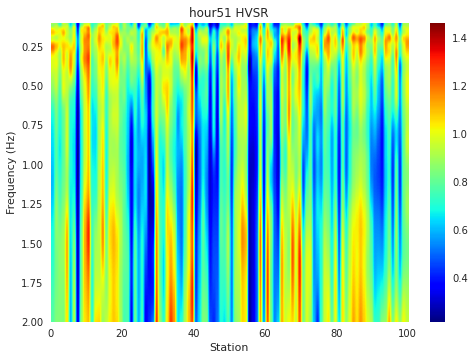

In [63]:
with plt.style.context(['seaborn']):
    plt.imshow(yy.T, aspect='auto', extent=[0, len(yy), hv.frq.max(), hv.frq.min()], cmap='jet')
    # plt.yscale('log')
    plt.grid(False)
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Station')
    plt.title('hour51 HVSR')
    plt.colorbar()

In [ ]:
plt.plot(hv.frq, yy.mean(axis=0), 'k', lw=2)

In [ ]:
!pip install wrf-python

In [ ]:
import wrf

data_smooth2 = wrf.smooth2d(yy, 20, cenweight=0.01)

In [ ]:
with plt.style.context(['seaborn']):
    plt.imshow(data_smooth2.T, aspect='auto', extent=[0, len(yy), hv.frq.max(), hv.frq.min()], cmap='jet')
    plt.grid(False)
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Station')
    plt.title('hour117 HVSR')
    plt.colorbar()

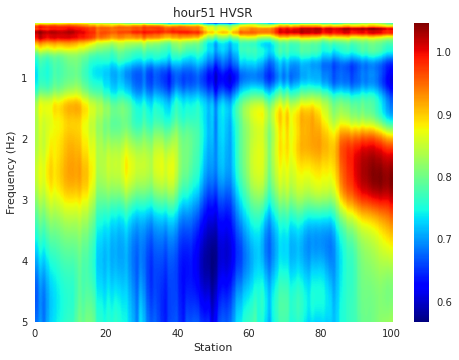

In [10]:
from smooth2a import smooth2a

data1 = smooth2a(yy, 10, 2)

with plt.style.context(['seaborn']):
    plt.imshow(data1.T, aspect='auto', extent=[0, len(yy), hv.frq.max(), hv.frq.min()], cmap='jet')
    # plt.yscale('log')
    plt.grid(False)
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Station')
    plt.title('hour51 HVSR')
    plt.colorbar()

In [ ]:
from matplotlib.colors import LogNorm

with plt.style.context(['seaborn']):
    plt.imshow(data1.T, aspect='auto', extent=[0, len(yy), hv.frq.max(), hv.frq.min()], cmap='jet')
    plt.grid(False)
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Station')
    plt.title('hour117 HVSR')
    plt.colorbar()

In [ ]:
import obspy 
import numpy as np
import matplotlib.pyplot as plt
import pathlib

import hvsrpy


file1 = pathlib.Path('./data/XP.BRIZ2..EHE.D.2018.156')
file2 = pathlib.Path('./data/XP.BRIZ2..EHN.D.2018.156')
file3 = pathlib.Path('./data/XP.BRIZ2..EHZ.D.2018.156')

data_all = []
for file in [file1, file2, file3]:
    data_all.append(obspy.read(str(file)))

time_start = []
time_end = []
for data in data_all:
    time_start.append(data[0].stats.starttime)
    time_end.append(data[0].stats.endtime)

time_max = max(time_start)
time_min = min(time_end)

cut_data = []
for data in data_all:
    cut_data.append(data.trim(starttime=time_max, endtime=time_min)[0])

# final_data = obspy.Stream(traces=cut_data)

In [ ]:
file1 = pathlib.Path('./data/XP.BRIZ2..EHE.D.2018.156')
file2 = pathlib.Path('./data/XP.BRIZ2..EHN.D.2018.156')
file3 = pathlib.Path('./data/XP.BRIZ2..EHZ.D.2018.156')

In [ ]:
data1 = obspy.read(str(file1))
data2 = obspy.read(str(file2))
data3 = obspy.read(str(file3))

data_all = [data1, data2, data3]

In [ ]:
data1

In [ ]:
data2

In [ ]:
data3

In [ ]:
# time1_start = data1[0].stats.starttime
# time2_start = data2[0].stats.starttime
# time3_start = data3[0].stats.starttime

# time1_end = data1[0].stats.endtime
# time2_end = data2[0].stats.endtime
# time3_end = data3[0].stats.endtime

# time_start = [time1_start, time2_start, time3_start]
# time_end = [time1_end, time2_end, time3_end]


time_start = []
time_end = []
for data in data_all:
    time_start.append(data[0].stats.starttime)
    time_end.append(data[0].stats.endtime)

time_max = max(time_start)
time_min = min(time_end)

In [ ]:
trace1 = data1.trim(starttime=time_max, endtime=time_min)
trace2 = data2.trim(starttime=time_max, endtime=time_min)

In [ ]:
cut_data = []
for data in data_all:
    cut_data.append(data.trim(starttime=time_max, endtime=time_min)[0])

In [ ]:
cut_data

In [ ]:
final_data = obspy.Stream(traces=cut_data)

In [ ]:
final_data

In [ ]:
final_data.write('test.mseed', format='MSEED')

In [ ]:
data = obspy.Stream(traces=[data1[0], data2[0], data3[0]])

In [ ]:
### Time Domain Settings

windowlength = 60

filter_bool = False       
filter_flow = 0.1                   
filter_fhigh = 40                  
filter_order = 5

# Width of cosine taper {0. - 1.}. Geopsy default of 0.05 is equal to 0.1 -> 0.1 is recommended
# 余弦锥度宽度 {0. - 1.}。 Geopsy 默认值 0.05 等于 0.1 -> 建议使用 0.1
width = 0.1

### Frequency Domain Settings

# Konno and Ohmachi smoothing constant. 40 is recommended.
bandwidth = 40
# Minimum frequency after resampling
resample_fmin = 0.5
# Maximum frequency after resampling
resample_fmax = 30
# Number of frequencies after resampling 重采样后的频率点数
resample_fnum = 1000
# Type of resampling {'log', 'linear'}
resample_type = 'log'
# Upper and lower frequency limits to restrict peak selection. To use the entire range use `None`.
peak_f_lower = None
peak_f_upper = None


### HVSR Settings

# Method for combining horizontal components {"squared-average", "geometric-mean", "single-azimuth"}.
# Geopsy's default is "squared-average" -> "geometric-mean" is recommended.
method = "geometric-mean"
# If method="single-azimuth", set azimuth in degree clock-wise from north. If method!="single-azimuth", value is ignored.
azimuth = 0

# Boolean to control whether frequency domain rejection proposed by Cox et al. (2020) is applied.
# Geopsy does not offer this functionality.
rejection_bool = True
# Number of standard deviations to consider during rejection. Smaller values will reject more windows -> 2 is recommended.
n = 2
# Maximum number of iterations to perform for rejection -> 50 is recommended.
max_iterations = 50

# Distribution of f0 {"lognormal", "normal"}. Geopsy default "normal" -> "lognormal" is recommended.
distribution_f0 = "lognormal"
# Distribution of mean curve {"lognormal", "normal"}. Geopsy default "lognormal" -> "lognormal" is recommended.
distribution_mc = "lognormal"


### Plot Settings

# Manually set the ylimits of the HVSR figures. Default is None so limits will be set automatically.
ymin, ymax = None, None

In [ ]:
file_name = 'test.mseed'
sensor = hvsrpy.Sensor3c.from_mseed(str(file_name))

bp_filter = {"flag":filter_bool, 
            "flow":filter_flow, 
            "fhigh":filter_fhigh, 
            "order":filter_order}

resampling = {"minf":resample_fmin, 
            "maxf":resample_fmax, 
            "nf":resample_fnum, 
            "res_type":resample_type}

hv = sensor.hv(windowlength, 
            bp_filter, 
            width, 
            bandwidth, 
            resampling, 
            method, 
            f_low=peak_f_lower, 
            f_high=peak_f_upper, 
            azimuth=azimuth)

In [ ]:

with plt.style.context('ggplot'):
    fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=150)
    ax.plot(hv.frq, hv.mean_curve(distribution_mc), color='k', linewidth=1.3, zorder=3, label='Mean')
    ax.plot(hv.frq, hv.nstd_curve(-1, distribution_mc), color='r', linestyle='--', linewidth=1.0, zorder=3, label='Mean +/- 1 std')
    ax.plot(hv.frq, hv.nstd_curve(+1, distribution_mc), color='g', linestyle='--', linewidth=1.0, zorder=3, label='Mean +/- 1 std')
    

In [ ]:
# with plt.style.context(['seaborn', 'seaborn-notebook', 'seaborn-darkgrid']):
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=150)
    ax.plot(hv.frq, hv.mean_curve(distribution_mc), color='k', linewidth=1.3, zorder=3, label='Mean')
    ax.plot(hv.frq, hv.nstd_curve(-1, distribution_mc), color='r', linestyle='--', linewidth=1.0, zorder=3, label='Mean +/- 1 std')
    ax.plot(hv.frq, hv.nstd_curve(+1, distribution_mc), color='g', linestyle='--', linewidth=1.0, zorder=3, label='Mean +/- 1 std')
    
    for i, peak in enumerate(f_peaks):
        ax.axvline(x=peak, color='orange', linestyle='-.', linewidth=1.0, zorder=3)
    ax.axvline(x=peak, color='orange', linestyle='-.', linewidth=1.0, zorder=3, label='Peaks')
    ax.set_xscale('log')
    ticks = ax.set_xticks(list(f_peaks))
    labels = ax.set_xticklabels([str(round(f, 1)) for f in f_peaks], rotation = 30,fontsize = 'small')
    
    ax.set_xlim(1., 50.)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("HVSR Amplitude")
    ax.set_title('station: ' + str(station) + ' ' + file_name.stem + ' HVSR Curve')
    ax.legend()
    
    fig.tight_layout()


In [ ]:
import scipy
scipy.io.savemat('hour117_hv.mat', {'hour117':yy})

In [ ]:
hv_df['453013328']

In [ ]:
import pandas as pd

mydf = pd.DataFrame()
dirname = '453014616'

for file_name in files[dirname]:
    print(file_name)

    sensor = hvsrpy.Sensor3c.from_mseed(str(file_name))

    bp_filter = {"flag":filter_bool, 
                "flow":filter_flow, 
                "fhigh":filter_fhigh, 
                "order":filter_order}

    resampling = {"minf":resample_fmin, 
                "maxf":resample_fmax, 
                "nf":resample_fnum, 
                "res_type":resample_type}

    hv = sensor.hv(windowlength, 
                bp_filter, 
                width, 
                bandwidth, 
                resampling, 
                method, 
                f_low=peak_f_lower, 
                f_high=peak_f_upper, 
                azimuth=azimuth)

    peaks = find_peaks(hv.mean_curve(distribution_mc))[0]

    mydata = {
        'x': hv.frq[peaks],
        'y': hv.mean_curve(distribution_mc)[peaks],
        'name': file_name.stem
    }
    df = pd.DataFrame(mydata)
    mydf =pd.concat([mydf, df], axis=0)

mydf.to_csv(f'{dirname}_peaks.csv', index=False)

In [ ]:
mydf.to_csv('453013328.csv', index=False)

In [ ]:
mydf = pd.read_csv('453013328.csv')

In [ ]:
import seaborn as sns

sns.set(style='darkgrid')

g = sns.relplot(x="x", y="y", hue="name", data=mydf, height=10, aspect=1.5, s=20, legend=False)
g.set_axis_labels("Frequency [Hz]", "Amplitude")
g.set_titles("453013328 H/V peaks")
plt.show()

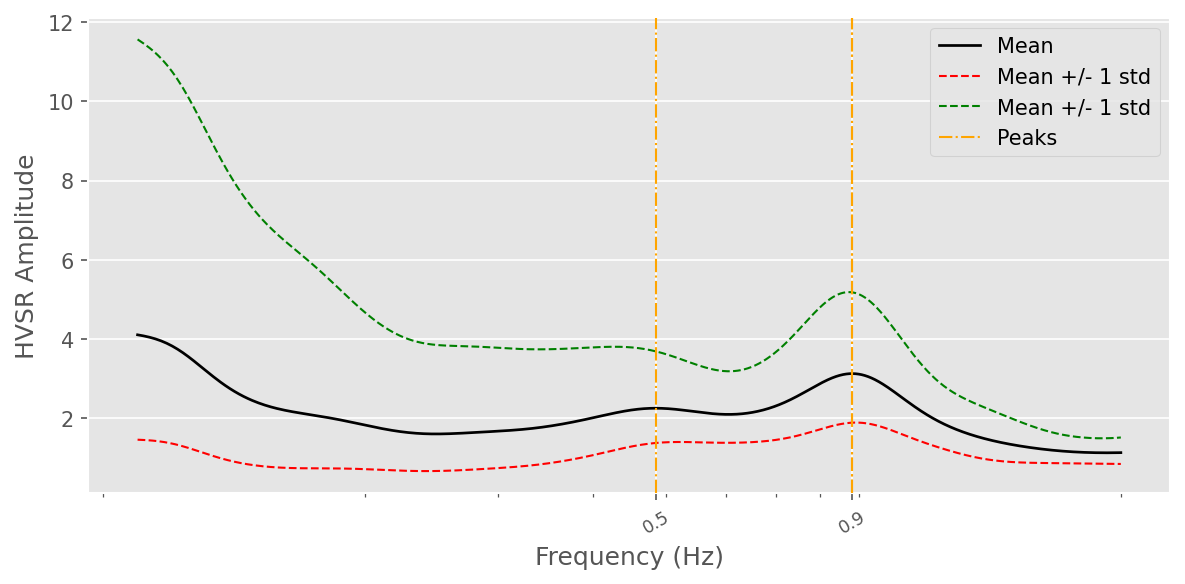

In [93]:
# with plt.style.context(['seaborn', 'seaborn-notebook', 'seaborn-darkgrid']):
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=150)
    ax.plot(hv.frq, hv.mean_curve(distribution_mc), color='k', linewidth=1.3, zorder=3, label='Mean')
    ax.plot(hv.frq, hv.nstd_curve(-1, distribution_mc), color='r', linestyle='--', linewidth=1.0, zorder=3, label='Mean +/- 1 std')
    ax.plot(hv.frq, hv.nstd_curve(+1, distribution_mc), color='g', linestyle='--', linewidth=1.0, zorder=3, label='Mean +/- 1 std')
    
    for i, peak in enumerate(f_peaks):
        ax.axvline(x=peak, color='orange', linestyle='-.', linewidth=1.0, zorder=3)
    ax.axvline(x=peak, color='orange', linestyle='-.', linewidth=1.0, zorder=3, label='Peaks')
    ax.set_xscale('log')
    ticks = ax.set_xticks(list(f_peaks))
    labels = ax.set_xticklabels([str(round(f, 1)) for f in f_peaks], rotation = 30,fontsize = 'small')
    
    # ax.set_xlim(1., 50.)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("HVSR Amplitude")
    # ax.set_title('station: ' + str(station) + ' ' + file_name.stem + ' HVSR Curve')
    ax.legend()
    
    fig.tight_layout()


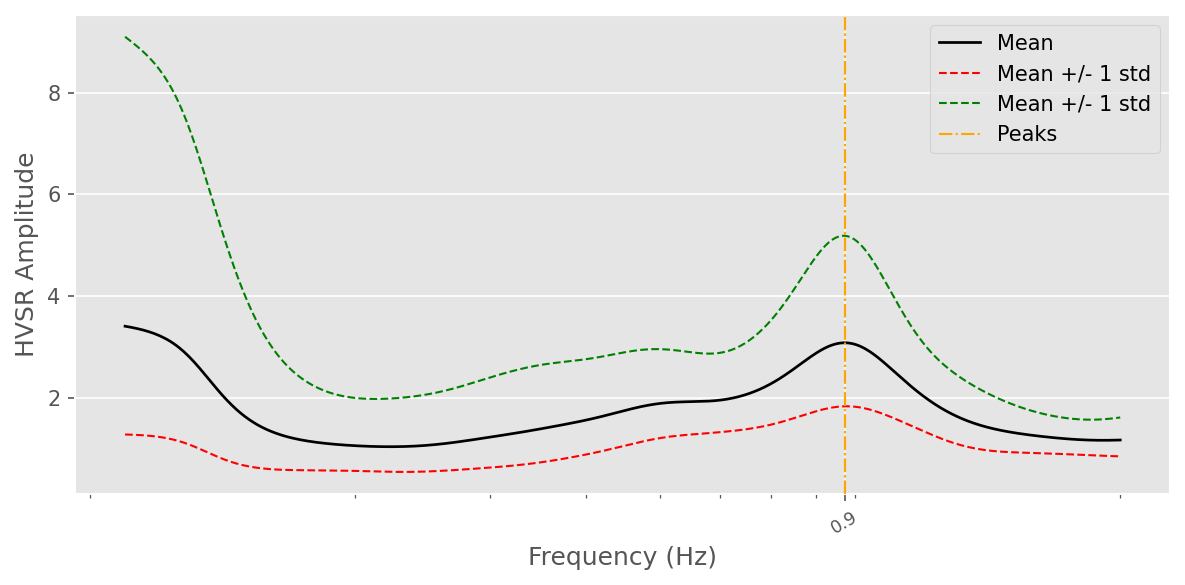

In [98]:
# with plt.style.context(['seaborn', 'seaborn-notebook', 'seaborn-darkgrid']):
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=150)
    ax.plot(hv.frq, hv.mean_curve(distribution_mc), color='k', linewidth=1.3, zorder=3, label='Mean')
    ax.plot(hv.frq, hv.nstd_curve(-1, distribution_mc), color='r', linestyle='--', linewidth=1.0, zorder=3, label='Mean +/- 1 std')
    ax.plot(hv.frq, hv.nstd_curve(+1, distribution_mc), color='g', linestyle='--', linewidth=1.0, zorder=3, label='Mean +/- 1 std')
    
    for i, peak in enumerate(f_peaks):
        ax.axvline(x=peak, color='orange', linestyle='-.', linewidth=1.0, zorder=3)
    ax.axvline(x=peak, color='orange', linestyle='-.', linewidth=1.0, zorder=3, label='Peaks')
    ax.set_xscale('log')
    ticks = ax.set_xticks(list(f_peaks))
    labels = ax.set_xticklabels([str(round(f, 1)) for f in f_peaks], rotation = 30,fontsize = 'small')
    
    # ax.set_xlim(1., 50.)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("HVSR Amplitude")
    # ax.set_title('station: ' + str(station) + ' ' + file_name.stem + ' HVSR Curve')
    ax.legend()
    
    fig.tight_layout()


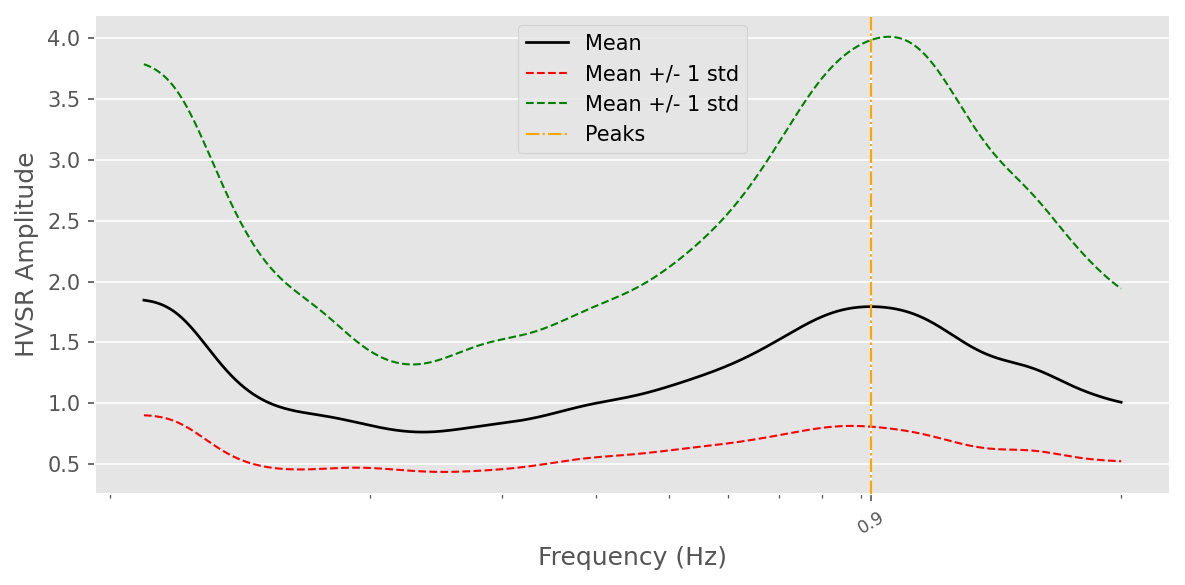

In [106]:
# with plt.style.context(['seaborn', 'seaborn-notebook', 'seaborn-darkgrid']):
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=150)
    ax.plot(hv.frq, hv.mean_curve(distribution_mc), color='k', linewidth=1.3, zorder=3, label='Mean')
    ax.plot(hv.frq, hv.nstd_curve(-1, distribution_mc), color='r', linestyle='--', linewidth=1.0, zorder=3, label='Mean +/- 1 std')
    ax.plot(hv.frq, hv.nstd_curve(+1, distribution_mc), color='g', linestyle='--', linewidth=1.0, zorder=3, label='Mean +/- 1 std')
    
    for i, peak in enumerate(f_peaks):
        ax.axvline(x=peak, color='orange', linestyle='-.', linewidth=1.0, zorder=3)
    ax.axvline(x=peak, color='orange', linestyle='-.', linewidth=1.0, zorder=3, label='Peaks')
    ax.set_xscale('log')
    ticks = ax.set_xticks(list(f_peaks))
    labels = ax.set_xticklabels([str(round(f, 1)) for f in f_peaks], rotation = 30,fontsize = 'small')
    
    # ax.set_xlim(1., 50.)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("HVSR Amplitude")
    # ax.set_title('station: ' + str(station) + ' ' + file_name.stem + ' HVSR Curve')
    ax.legend()
    
    fig.tight_layout()


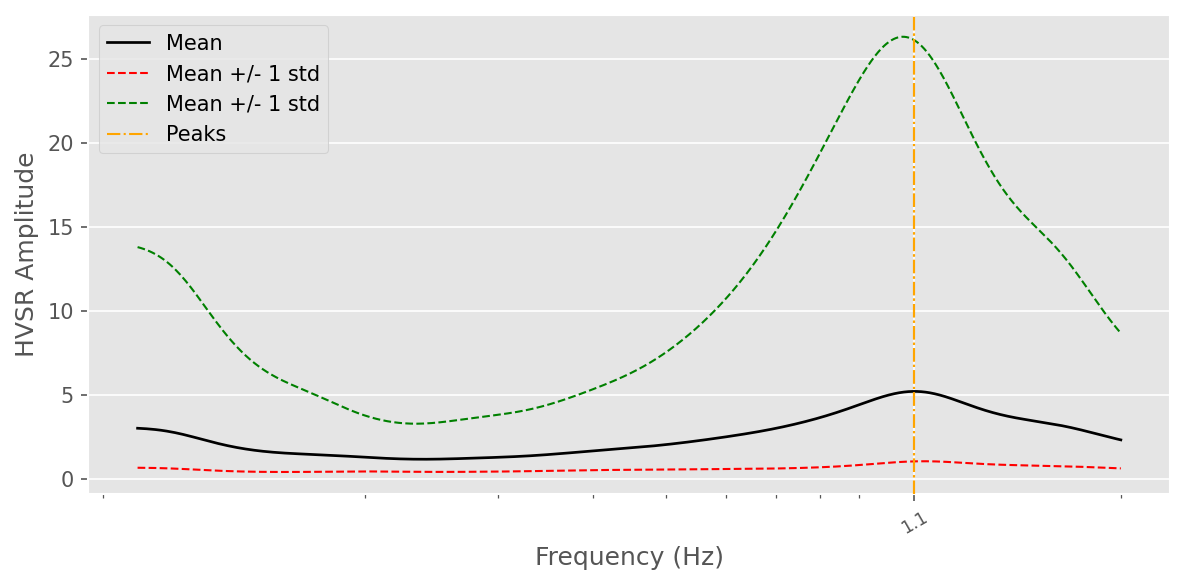

In [111]:
# with plt.style.context(['seaborn', 'seaborn-notebook', 'seaborn-darkgrid']):
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=150)
    ax.plot(hv.frq, hv.mean_curve(distribution_mc), color='k', linewidth=1.3, zorder=3, label='Mean')
    ax.plot(hv.frq, hv.nstd_curve(-1, distribution_mc), color='r', linestyle='--', linewidth=1.0, zorder=3, label='Mean +/- 1 std')
    ax.plot(hv.frq, hv.nstd_curve(+1, distribution_mc), color='g', linestyle='--', linewidth=1.0, zorder=3, label='Mean +/- 1 std')
    
    for i, peak in enumerate(f_peaks):
        ax.axvline(x=peak, color='orange', linestyle='-.', linewidth=1.0, zorder=3)
    ax.axvline(x=peak, color='orange', linestyle='-.', linewidth=1.0, zorder=3, label='Peaks')
    ax.set_xscale('log')
    ticks = ax.set_xticks(list(f_peaks))
    labels = ax.set_xticklabels([str(round(f, 1)) for f in f_peaks], rotation = 30,fontsize = 'small')
    
    # ax.set_xlim(1., 50.)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("HVSR Amplitude")
    # ax.set_title('station: ' + str(station) + ' ' + file_name.stem + ' HVSR Curve')
    ax.legend()
    
    fig.tight_layout()


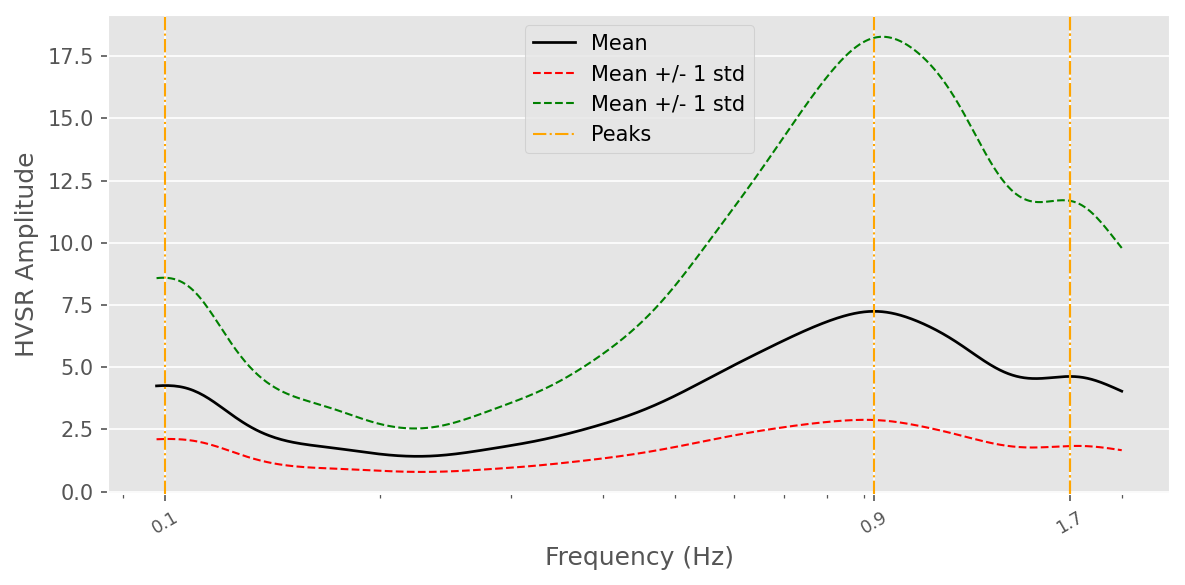

In [116]:
# with plt.style.context(['seaborn', 'seaborn-notebook', 'seaborn-darkgrid']):
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=150)
    ax.plot(hv.frq, hv.mean_curve(distribution_mc), color='k', linewidth=1.3, zorder=3, label='Mean')
    ax.plot(hv.frq, hv.nstd_curve(-1, distribution_mc), color='r', linestyle='--', linewidth=1.0, zorder=3, label='Mean +/- 1 std')
    ax.plot(hv.frq, hv.nstd_curve(+1, distribution_mc), color='g', linestyle='--', linewidth=1.0, zorder=3, label='Mean +/- 1 std')
    
    for i, peak in enumerate(f_peaks):
        ax.axvline(x=peak, color='orange', linestyle='-.', linewidth=1.0, zorder=3)
    ax.axvline(x=peak, color='orange', linestyle='-.', linewidth=1.0, zorder=3, label='Peaks')
    ax.set_xscale('log')
    ticks = ax.set_xticks(list(f_peaks))
    labels = ax.set_xticklabels([str(round(f, 1)) for f in f_peaks], rotation = 30,fontsize = 'small')
    
    # ax.set_xlim(1., 50.)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("HVSR Amplitude")
    # ax.set_title('station: ' + str(station) + ' ' + file_name.stem + ' HVSR Curve')
    ax.legend()
    
    fig.tight_layout()


In [25]:
import obspy
import numpy as np
import pathlib
import hvsrpy

path_Z      = pathlib.Path('/media/user/Extreme Pro/YXMK/YXsac/z_component')
path_X      = pathlib.Path('/media/user/Extreme Pro/YXMK/YXsac/x_component')
path_Y      = pathlib.Path('/media/user/Extreme Pro/YXMK/YXsac/y_component')

dirs_Z = sorted(path_Z.glob('*.00000001.2023.07.30.*'))
dirs_X = sorted(path_X.glob('*.00000001.2023.07.30.*'))
dirs_Y = sorted(path_Y.glob('*.00000001.2023.07.30.*'))


In [2]:
data_Z = obspy.read(str(dirs_Z[40]))
data_X = obspy.read(str(dirs_X[40]))
data_Y = obspy.read(str(dirs_Y[40]))

In [26]:
hvs = {}
for file_Z, file_X, file_Y in zip(dirs_Z, dirs_X, dirs_Y):
    try:
        data_Z = obspy.read(str(file_Z))
        data_X = obspy.read(str(file_X))
        data_Y = obspy.read(str(file_Y))
        st = obspy.Stream(traces=[data_Z[0], data_X[0], data_Y[0]])
        st[0].meta.channel = 'BHZ'
        st[1].meta.channel = 'BHN'
        st[2].meta.channel = 'BHE'
        st.write('test.mseed', format='MSEED')
        
        file_name = 'test.mseed'

        sensor = hvsrpy.Sensor3c.from_mseed(str(file_name))

        bp_filter = {"flag":filter_bool, 
                    "flow":filter_flow, 
                    "fhigh":filter_fhigh, 
                    "order":filter_order}

        resampling = {"minf":resample_fmin, 
                    "maxf":resample_fmax, 
                    "nf":resample_fnum, 
                    "res_type":resample_type}

        hv = sensor.hv(windowlength, 
                    bp_filter, 
                    width, 
                    bandwidth, 
                    resampling, 
                    method, 
                    f_low=peak_f_lower, 
                    f_high=peak_f_upper, 
                    azimuth=azimuth)
        name = file_Z.stem.split('.')[0]
        hvs[name] = hv.mean_curve(distribution_mc)
        print('Done! ', file_Z.stem)

    except:
        print('Error! ', file_Z.stem)
        continue

Done!  453013328.00000001.2023.07.30.01.37.26.000.z


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline




In [16]:
hvs.keys()

dict_keys(['453013328', '453014616', '453014638', '453015539'])

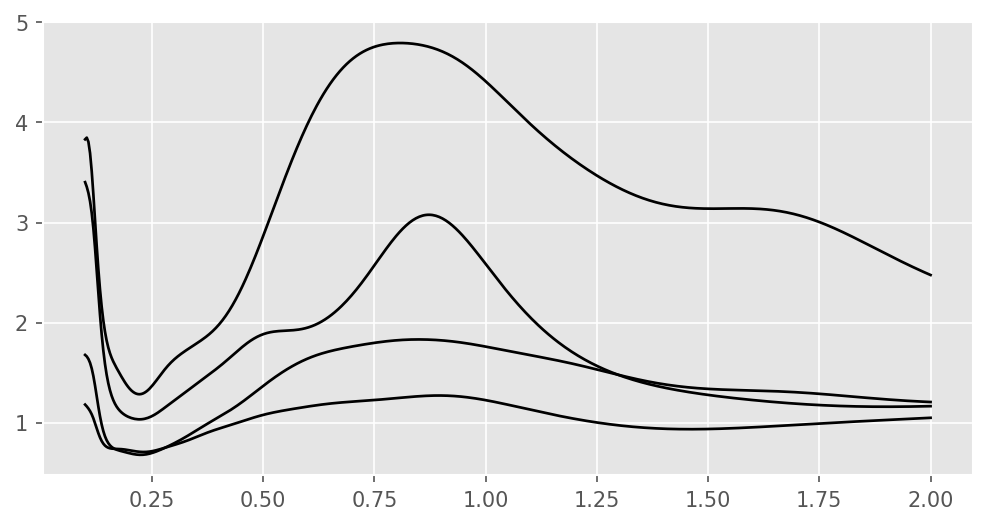

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

with plt.style.context('ggplot'):
    fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=150)
    ax.plot(hv.frq, hvs['453013328'], color='k', linewidth=1.3, zorder=3, label='Mean')
    ax.plot(hv.frq, hvs['453014616'], color='k', linewidth=1.3, zorder=3, label='Mean')
    ax.plot(hv.frq, hvs['453014638'], color='k', linewidth=1.3, zorder=3, label='Mean')
    ax.plot(hv.frq, hvs['453015539'], color='k', linewidth=1.3, zorder=3, label='Mean')


In [113]:
st = obspy.Stream(traces=[data_Z[0], data_X[0], data_Y[0]])
st[0].meta.channel = 'BHZ'
st[1].meta.channel = 'BHN'
st[2].meta.channel = 'BHE'

In [114]:
st.write('test.mseed', format='MSEED')

In [115]:
file_name = 'test.mseed'

sensor = hvsrpy.Sensor3c.from_mseed(str(file_name))


bp_filter = {"flag":filter_bool, 
             "flow":filter_flow, 
             "fhigh":filter_fhigh, 
             "order":filter_order}

resampling = {"minf":resample_fmin, 
              "maxf":resample_fmax, 
              "nf":resample_fnum, 
              "res_type":resample_type}

hv = sensor.hv(windowlength, 
               bp_filter, 
               width, 
               bandwidth, 
               resampling, 
               method, 
               f_low=peak_f_lower, 
               f_high=peak_f_upper, 
               azimuth=azimuth)

peaks = find_peaks(hv.mean_curve(distribution_mc))
f_peaks = hv.frq[peaks[0]]

In [117]:
hv

In [ ]:
data

In [120]:
a = hv.mean_curve(distribution_mc)

a.shape

(2048,)